In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

In [ ]:
# df= pd.read_csv('CICDDoS 2 percent with 24 Features.csv')

In [ ]:
df[' Label']=df[' Label'].apply({'Portmap':'Portmao','WebDDoS': 'WebDDoS','DrDoS_DNS':'DrDoS_DNS','BENIGN':'BENIGN' , 'DrDoS_NTP':'DrDoS_NTP', 'DrDoS_SNMP':'DrDoS_SNMP', 'DrDoS_SSDP':'DrDoS_SSDP', 'DrDoS_UDP':'DrDoS_UDP', 'LDAP':'LDAP', 'MSSQL': 'MSSQL', 'NetBIOS':'NetBIOS','Syn':'Syn', 'TFTP':'TFTP', 'UDP-lag':'UDP-lag'}.get)

In [ ]:
NaN_values1=df.isnull().sum()
NaN_values1

Unnamed: 0                        0
 Source Port                      0
 Destination Port                 0
Total Length of Fwd Packets       0
 Fwd Packet Length Max            0
 Fwd Packet Length Min            0
 Fwd Packet Length Mean           0
Flow Bytes/s                   5024
 Flow Packets/s                   0
 Flow IAT Std                     0
 Flow IAT Min                     0
 Fwd IAT Min                      0
 Fwd Header Length                0
Fwd Packets/s                     0
 Min Packet Length                0
 Max Packet Length                0
 Packet Length Mean               0
 ACK Flag Count                   0
 Average Packet Size              0
 Avg Fwd Segment Size             0
 Fwd Header Length.1              0
 Subflow Fwd Bytes                0
Init_Win_bytes_forward            0
 min_seg_size_forward             0
 Inbound                          0
 Label                            0
dtype: int64

In [ ]:
df = df.drop(columns="Unnamed: 0")

df = df.replace(np.PINF, 0)
df['Flow Bytes/s'].fillna(df['Flow Bytes/s'].mean(),inplace=True)
#NaN_values1=df.isnull().sum()
#NaN_values1

In [ ]:
df= shuffle (df)
df.head(30)

,Source Port,Destination Port,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Flow Bytes/s,Flow Packets/s,Flow IAT Std,Flow IAT Min,...,Packet Length Mean,ACK Flag Count,Average Packet Size,Avg Fwd Segment Size,Fwd Header Length.1,Subflow Fwd Bytes,Init_Win_bytes_forward,min_seg_size_forward,Inbound,Label
1074,62483,50008,2064.0,516.0,516.0,516.0,6.880803e+02,1.333489e+00,1.731847e+06,1.0,...,516.0,0,645.0,516.0,40,2064,-1,0,1,TFTP
405811,564,22097,2944.0,1472.0,1472.0,1472.0,6.263830e+07,4.255319e+04,0.000000e+00,47.0,...,1472.0,0,2208.0,1472.0,2944,2944,-1,1472,1,DrDoS_DNS
346721,55386,59922,802.0,401.0,401.0,401.0,8.020000e+08,2.000000e+06,0.000000e+00,1.0,...,401.0,0,601.5,401.0,40,802,-1,20,1,DrDoS_SSDP
552329,524,4733,458.0,229.0,229.0,229.0,4.580000e+08,2.000000e+06,0.000000e+00,1.0,...,229.0,0,343.5,229.0,16,458,-1,8,1,NetBIOS
82454,53158,3906,816.0,408.0,408.0,408.0,8.160000e+08,2.000000e+06,0.000000e+00,1.0,...,408.0,0,612.0,408.0,16,816,-1,8,1,MSSQL
22922,739,17230,458.0,229.0,229.0,229.0,9.956522e+06,4.347826e+04,0.000000e+00,46.0,...,229.0,0,343.5,229.0,458,458,-1,229,1,DrDoS_SNMP
1018180,634,19706,44000.0,440.0,440.0,440.0,7.638889e+07,1.736111e+05,1.334194e+01,0.0,...,440.0,0,444.4,440.0,-100,44000,-1,-1,1,DrDoS_NTP
725322,40614,39084,812.0,406.0,406.0,406.0,8.120000e+08,2.000000e+06,0.000000e+00,1.0,...,406.0,0,609.0,406.0,40,812,-1,20,1,MSSQL
828000,49751,14416,802.0,401.0,401.0,401.0,8.020000e+08,2.000000e+06,0.000000e+00,1.0,...,401.0,0,601.5,401.0,0,802,-1,0,1,DrDoS_UDP
30595,8439,40681,1032.0,516.0,516.0,516.0,1.032000e+09,2.000000e+06,0.000000e+00,1.0,...,516.0,0,774.0,516.0,40,1032,-1,20,1,TFTP


In [ ]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
df.head(30)

,Source Port,Destination Port,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Flow Bytes/s,Flow Packets/s,Flow IAT Std,Flow IAT Min,...,Packet Length Mean,ACK Flag Count,Average Packet Size,Avg Fwd Segment Size,Fwd Header Length.1,Subflow Fwd Bytes,Init_Win_bytes_forward,min_seg_size_forward,Inbound,Label
1074,62483,50008,2064.0,516.0,516.0,516.0,6.880803e+02,1.333489e+00,1.731847e+06,1.0,...,516.0,0,645.0,516.0,40,2064,-1,0,1,11
405811,564,22097,2944.0,1472.0,1472.0,1472.0,6.263830e+07,4.255319e+04,0.000000e+00,47.0,...,1472.0,0,2208.0,1472.0,2944,2944,-1,1472,1,1
346721,55386,59922,802.0,401.0,401.0,401.0,8.020000e+08,2.000000e+06,0.000000e+00,1.0,...,401.0,0,601.5,401.0,40,802,-1,20,1,4
552329,524,4733,458.0,229.0,229.0,229.0,4.580000e+08,2.000000e+06,0.000000e+00,1.0,...,229.0,0,343.5,229.0,16,458,-1,8,1,8
82454,53158,3906,816.0,408.0,408.0,408.0,8.160000e+08,2.000000e+06,0.000000e+00,1.0,...,408.0,0,612.0,408.0,16,816,-1,8,1,7
22922,739,17230,458.0,229.0,229.0,229.0,9.956522e+06,4.347826e+04,0.000000e+00,46.0,...,229.0,0,343.5,229.0,458,458,-1,229,1,3
1018180,634,19706,44000.0,440.0,440.0,440.0,7.638889e+07,1.736111e+05,1.334194e+01,0.0,...,440.0,0,444.4,440.0,-100,44000,-1,-1,1,2
725322,40614,39084,812.0,406.0,406.0,406.0,8.120000e+08,2.000000e+06,0.000000e+00,1.0,...,406.0,0,609.0,406.0,40,812,-1,20,1,7
828000,49751,14416,802.0,401.0,401.0,401.0,8.020000e+08,2.000000e+06,0.000000e+00,1.0,...,401.0,0,601.5,401.0,0,802,-1,0,1,5
30595,8439,40681,1032.0,516.0,516.0,516.0,1.032000e+09,2.000000e+06,0.000000e+00,1.0,...,516.0,0,774.0,516.0,40,1032,-1,20,1,11


In [ ]:
####Separate the Features and Target class of the test set####
y = df.iloc[:,24].values
X = df.iloc[:,0:23].values

In [ ]:
X_shuf, y_shuf = shuffle(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_shuf,y_shuf, test_size=0.20, random_state = 1)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as pip
over = SMOTE(sampling_strategy={0:30000, 2:30000, 9:30000, 12:30000, 13:30000})
#under = RandomUnderSampler(sampling_strategy={ 1:30000,  3:30000,  4:30000, 5:30000, 7:30000, 8:30000,10:30000, 11:30000, 6:30000})
pip = pip(steps=[('o', over), ('u', under)])
X_train, y_train = pip.fit_resample(X_train, y_train)

In [ ]:
# Binarize the output for train set
#y_train = label_binarize(y_train, classes=[0, 1])
# Binarize the output for test set
#y_test = label_binarize(y_test, classes=[0, 1])
#y_train

In [ ]:
#Logistic Regration###
pipe_lr = Pipeline([('scl', StandardScaler()),('clf', LogisticRegression())])
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,X=X_train, y=y_train, train_sizes=np.linspace(0.2,1.0,10), cv=10, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
pipe_lr = pipe_lr.fit(X_train, y_train)
y_score = pipe_lr.fit(X_train, y_train).decision_function(X_train)
y_score1 = pipe_lr.fit(X_train, y_train).decision_function(X_test)

In [ ]:
y_pred_train = pipe_lr.predict(X_train)
y_pred_test = pipe_lr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_test)

In [ ]:
accuracy_score(y_train, y_pred_train)

In [ ]:
target_names = ['Benign','DNS', 'NTP', 'SNMP', 'SSDP', 'UDP', 'LDAP', 'MSSQL', 'NetBIOS', 'Portmap', 'SYN', 'TFTP', 'UDPLAG', 'WebDDoS']

In [ ]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

In [ ]:
#target_names = ['Benign','DNS', 'NTP', 'SNMP', 'SSDP', 'UDP', 'LDAP', 'MSSQL', 'NetBIOS', 'Portmap', 'SYN', 'TFTP', 'UDPLAG']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.62      0.78      0.69       494
         DNS       0.22      0.05      0.08     19888
         NTP       0.81      0.95      0.87      4769
        SNMP       0.66      0.73      0.69     20613
        SSDP       0.35      0.19      0.25     10504
         UDP       0.50      0.71      0.59     12547
        LDAP       0.30      0.77      0.43      7725
       MSSQL       0.51      0.76      0.61     22946
     NetBIOS       0.78      0.33      0.46     14814
     Portmap       0.05      0.73      0.09       742
         SYN       0.95      0.64      0.76     26127
        TFTP       0.96      0.78      0.86     80379
      UDPLAG       0.07      0.49      0.12      1501
     WebDDoS       0.01      0.67      0.02         3

    accuracy                           0.63    223052
   macro avg       0.48      0.61      0.47    223052
weighted avg       0.72      0.63      0.64    223052



In [ ]:
cm=confusion_matrix(y_train,y_pred_train)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
cm=confusion_matrix(y_test,y_pred_test)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize
y_train= label_binarize(y_train, classes= [0,1,2,3,4,5,6,7,8,9,10,11,12])
n1_classes=y_train.shape[1]
print ("Number of classes ="+ str(n1_classes))

Number of classes =13


In [ ]:
# Compute micro-average ROC curve and ROC area

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range (n1_classes) :
    fpr[i], tpr[i], _= roc_curve(y_train[:,i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

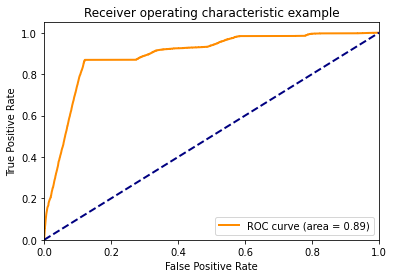

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[i], tpr[i], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Compute micro-average ROC curve and ROC area
y_test= label_binarize(y_test, classes= [0,1,2,3,4,5,6,7,8,9,10,11,12])
n_classes=y_test.shape[1]
print ("Number of classes ="+ str(n_classes))

Number of classes =13


In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range (n1_classes) :
    fpr[i], tpr[i], _= roc_curve(y_test[:,i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

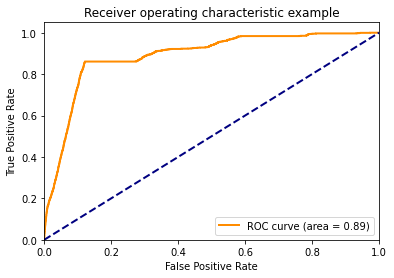

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[i], tpr[i], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()